In [ ]:
#!pip install torch torchvision
#!pip install -U git+https://github.com/luca-medeiros/lang-segment-anything.git

In [1]:
!git clone https://github.com/luca-medeiros/lang-segment-anything

Cloning into 'lang-segment-anything'...
remote: Enumerating objects: 376, done.
remote: Counting objects: 100% (160/160), done.
remote: Compressing objects: 100% (69/69), done.
remote: Total 376 (delta 115), reused 91 (delta 91), pack-reused 216 (from 1)
Receiving objects: 100% (376/376), 27.68 MiB | 17.10 MiB/s, done.
Resolving deltas: 100% (170/170), done.


In [2]:
%cd /content/lang-segment-anything

/content/lang-segment-anything


In [3]:
!ls

app.py	assets	Dockerfile  lang_sam  LICENSE  pyproject.toml  README.md  requirements.txt


In [4]:
!pip install -e .

Obtaining file:///content/lang-segment-anything
  Installing build dependencies ... done
  Checking if build backend supports build_editable ... done
  Getting requirements to build editable ... done
  Preparing editable metadata (pyproject.toml) ... done
  Cloning https://github.com/facebookresearch/segment-anything-2 (to revision c2ec8e14a185632b0a5d8b161928ceb50197eddc) to /tmp/pip-install-oirvqac7/sam-2_47b2bbe7246c4877b360a0cc7ee88110
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/segment-anything-2 /tmp/pip-install-oirvqac7/sam-2_47b2bbe7246c4877b360a0cc7ee88110
  Running command git rev-parse -q --verify 'sha^c2ec8e14a185632b0a5d8b161928ceb50197eddc'
  Running command git fetch -q https://github.com/facebookresearch/segment-anything-2 c2ec8e14a185632b0a5d8b161928ceb50197eddc
  Resolved https://github.com/facebookresearch/segment-anything-2 to commit c2ec8e14a185632b0a5d8b161928ceb50197eddc
  Installing build dependencies ... done
  Get

In [ ]:
import os
import gc
def mask(path_image,prompt) :
  import warnings
  import numpy as np
  import matplotlib.pyplot as plt
  import requests
  from PIL import Image
  from io import BytesIO
  from lang_sam import LangSAM

  image = path_image
  text_prompt = prompt

  def save_mask(mask_np, filename):
      mask_image = Image.fromarray((mask_np * 255).astype(np.uint8))
      mask_image.save(filename)

  def display_image_with_masks(image, masks):
      num_masks = len(masks)

      fig, axes = plt.subplots(1, num_masks + 1, figsize=(15, 5))
      axes[0].imshow(image)
      axes[0].set_title("Original Image")
      axes[0].axis('off')

      for i, mask_np in enumerate(masks):
          axes[i+1].imshow(mask_np, cmap='gray')
          axes[i+1].set_title(f"Mask {i+1}")
          axes[i+1].axis('off')

      plt.tight_layout()
      plt.show()

  def display_image_with_boxes(image, boxes, logits):
      fig, ax = plt.subplots()
      ax.imshow(image)
      ax.set_title("Image with Bounding Boxes")
      ax.axis('off')

      for box, logit in zip(boxes, logits):
          x_min, y_min, x_max, y_max = box
          confidence_score = round(logit.item(), 2)  # Convert logit to a scalar before rounding
          box_width = x_max - x_min
          box_height = y_max - y_min

          # Draw bounding box
          rect = plt.Rectangle((x_min, y_min), box_width, box_height, fill=False, edgecolor='red', linewidth=2)
          ax.add_patch(rect)

          # Add confidence score as text
          ax.text(x_min, y_min, f"Confidence: {confidence_score}", fontsize=8, color='red', verticalalignment='top')

      plt.show()

  def print_bounding_boxes(boxes):
      print("Bounding Boxes:")
      for i, box in enumerate(boxes):
          print(f"Box {i+1}: {box}")

  def print_detected_phrases(phrases):
      print("\nDetected Phrases:")
      for i, phrase in enumerate(phrases):
          print(f"Phrase {i+1}: {phrase}")

  def print_logits(logits):
      print("\nConfidence:")
      for i, logit in enumerate(logits):
          print(f"Logit {i+1}: {logit}")

  def main():
      # Suppress warning messages
      warnings.filterwarnings("ignore")

      try:
          if image.startswith("http"):
              image_pil = download_image(image)
          else:
              image_pil = Image.open(image).convert("RGB")

          base_name = os.path.basename(image)
          file_name_without_extension = os.path.splitext(base_name)[0]
          print(file_name_without_extension)

          model = LangSAM()
          masks, boxes, phrases, logits = model.predict(image_pil, text_prompt)

          if len(masks) == 0:
              print(f"No objects of the '{text_prompt}' prompt detected in the image.")
          else:
              # Convert masks to numpy arrays
              masks_np = [mask.squeeze().cpu().numpy() for mask in masks]

              # Display the original image and masks side by side
              display_image_with_masks(image_pil, masks_np)

              # Display the image with bounding boxes and confidence scores
              display_image_with_boxes(image_pil, boxes, logits)

              # Save the masks
              for i, mask_np in enumerate(masks_np):
                  mask_path = f"mask{file_name_without_extension}.png"
                  save_mask(mask_np, mask_path)

              # Print the bounding boxes, phrases, and logits
              print_bounding_boxes(boxes)
              print_detected_phrases(phrases)
              print_logits(logits)

              del model
              del masks
              del image_pil
              gc.collect()

      except (requests.exceptions.RequestException, IOError) as e:
          print(f"Error: {e}")

  if __name__ == "__main__":
      main()


In [ ]:
from google.colab import files
uploaded = files.upload()


KeyboardInterrupt: 

output_0031
final text_encoder_type: bert-base-uncased
Model loaded from /root/.cache/huggingface/hub/models--ShilongLiu--GroundingDINO/snapshots/a94c9b567a2a374598f05c584e96798a170c56fb/groundingdino_swinb_cogcoor.pth 
 => _IncompatibleKeys(missing_keys=[], unexpected_keys=['label_enc.weight', 'bert.embeddings.position_ids'])


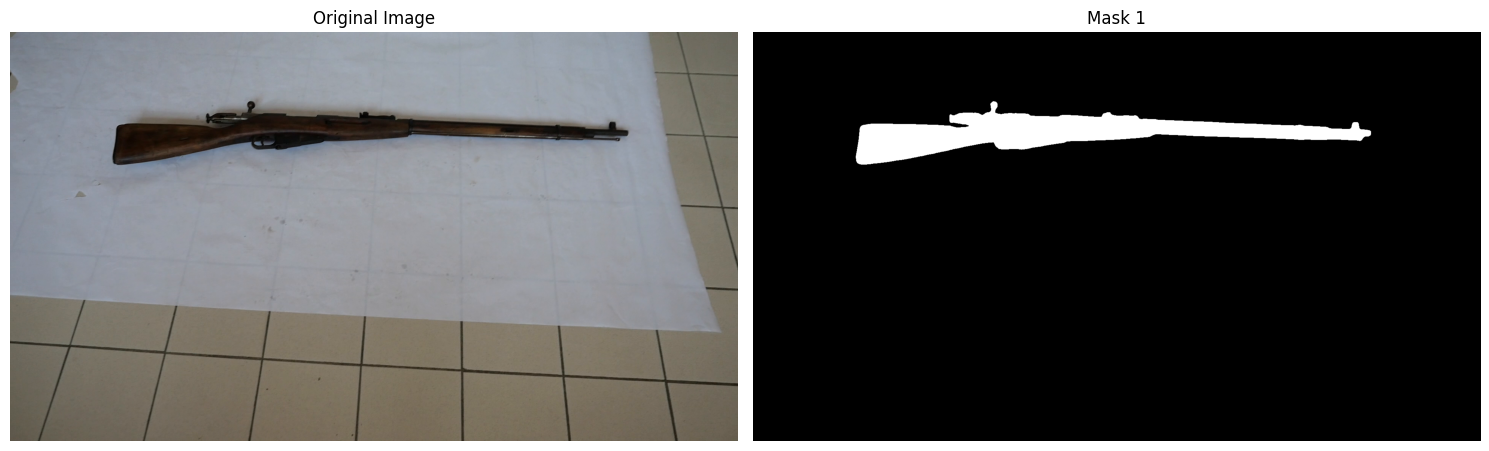

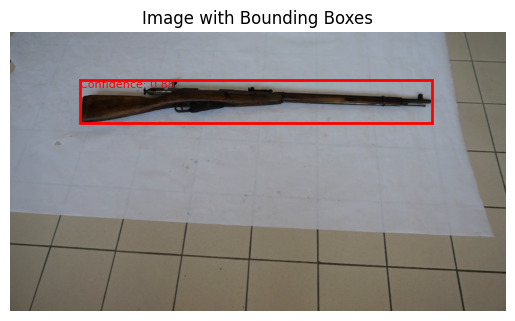

Bounding Boxes:
Box 1: tensor([ 268.7147,  184.0730, 1631.5386,  353.5158])

Detected Phrases:
Phrase 1: gun

Confidence:
Logit 1: 0.8760735988616943


In [ ]:
file_name = next(iter(uploaded.keys()))
mask(file_name, "gun")


In [ ]:
from google.colab import files


uploaded = files.upload()


for file_name in uploaded.keys():
    print(f"Processing file: {file_name}")
    mask(file_name, "gun")


Saving output_0015.png to output_0015.png
Saving output_0016.png to output_0016.png
Saving output_0017.png to output_0017.png
Saving output_0018.png to output_0018.png
Saving output_0019.png to output_0019.png
Processing file: output_0015.png


ModuleNotFoundError: No module named 'hydra'